## 1| IMPORT DEPENDENCIES

In [5]:
#!pip install scikit-learn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import figure_factory as figfac
from termcolor import colored
from sklearn.preprocessing import MinMaxScaler, StandardScaler


## 2| LOAD DATASET

In [6]:
df = pd.read_csv("crop_dataset.csv")

## 3| SHOW SUMMARIZED DATASET

In [7]:
fig = figfac.create_table(df.head(n=10))
fig.show()

## <b>4| INITIAL INFORMATION ABOUT DATASET</b>

#### <b>4.1| INITIAL INFORMATION ABOUT DATASET</b>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


#### <b>4.2| Descriptive statistics of dataset</b>

In [9]:
df.describe().T.style.set_properties(**{"background-color":"#26231C", "border-radius" : "1px"})

,count,mean,std,min,25%,50%,75%,max
N,1697.000000,52.647024,38.536964,0.000000,21.000000,37.000000,90.000000,140.000000
P,1697.000000,58.126105,34.164342,5.000000,36.000000,54.000000,72.000000,145.000000
K,1697.000000,52.031232,57.068796,5.000000,19.000000,27.000000,52.000000,205.000000
temperature,1697.000000,24.711674,4.910428,8.825675,21.631491,24.910323,27.834871,41.948657
humidity,1697.000000,65.848856,24.432640,14.258040,51.278688,77.906210,83.856427,94.964199
ph,1697.000000,6.438962,0.870411,3.504752,5.861399,6.354007,6.932537,9.935091
rainfall,1697.000000,99.364935,50.436396,5.314507,66.838723,93.123306,115.356032,298.560117



#### <b>4.3| Addition information about dataset</b>

In [10]:
print("Shape of the dataset: ", df.shape)
print("Length of the dataset: ", len(df))

Shape of the dataset:  (1697, 8)
Length of the dataset:  1697


#### <b>4.4| Correlation between variables of dataset</b>

In [11]:
df1 = df.drop('label', axis=1)
corr = df1.corr()
corr.style.background_gradient(cmap = "copper")

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.245443,-0.199120,0.003268,0.242780,0.119566,0.126947
P,-0.245443,1.000000,0.822431,-0.161702,0.027050,-0.255942,-0.020124
K,-0.199120,0.822431,1.000000,-0.165350,0.205490,-0.148136,-0.066860
temperature,0.003268,-0.161702,-0.165350,1.000000,0.211219,-0.106763,-0.056895
humidity,0.242780,0.027050,0.205490,0.211219,1.000000,0.012881,-0.008299
ph,0.119566,-0.255942,-0.148136,-0.106763,0.012881,1.000000,-0.104514
rainfall,0.126947,-0.020124,-0.066860,-0.056895,-0.008299,-0.104514,1.000000


## <b>5| DATA VISUALIZATION</b>


#### <b>5.1 Heatmap</b>

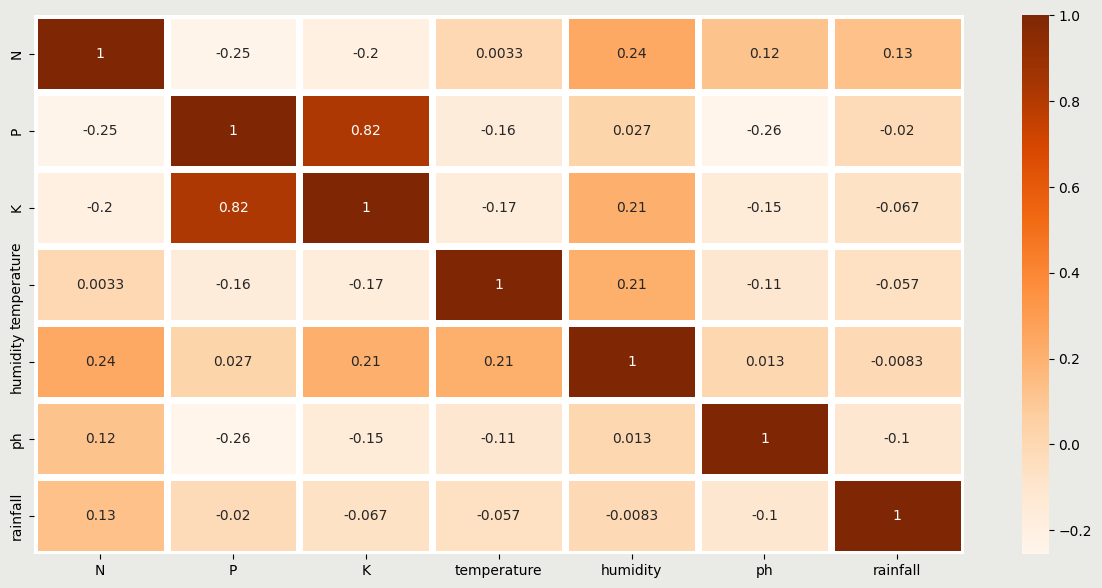

In [12]:
plt.figure(figsize = [15, 7], clear = True, facecolor = '#EAEAE6')
sns.heatmap(df1.corr(), annot = True, square = False, linewidths = 5,
            linecolor = "white", cmap = "Oranges");

#### <b>5.2 Pairplot</b>

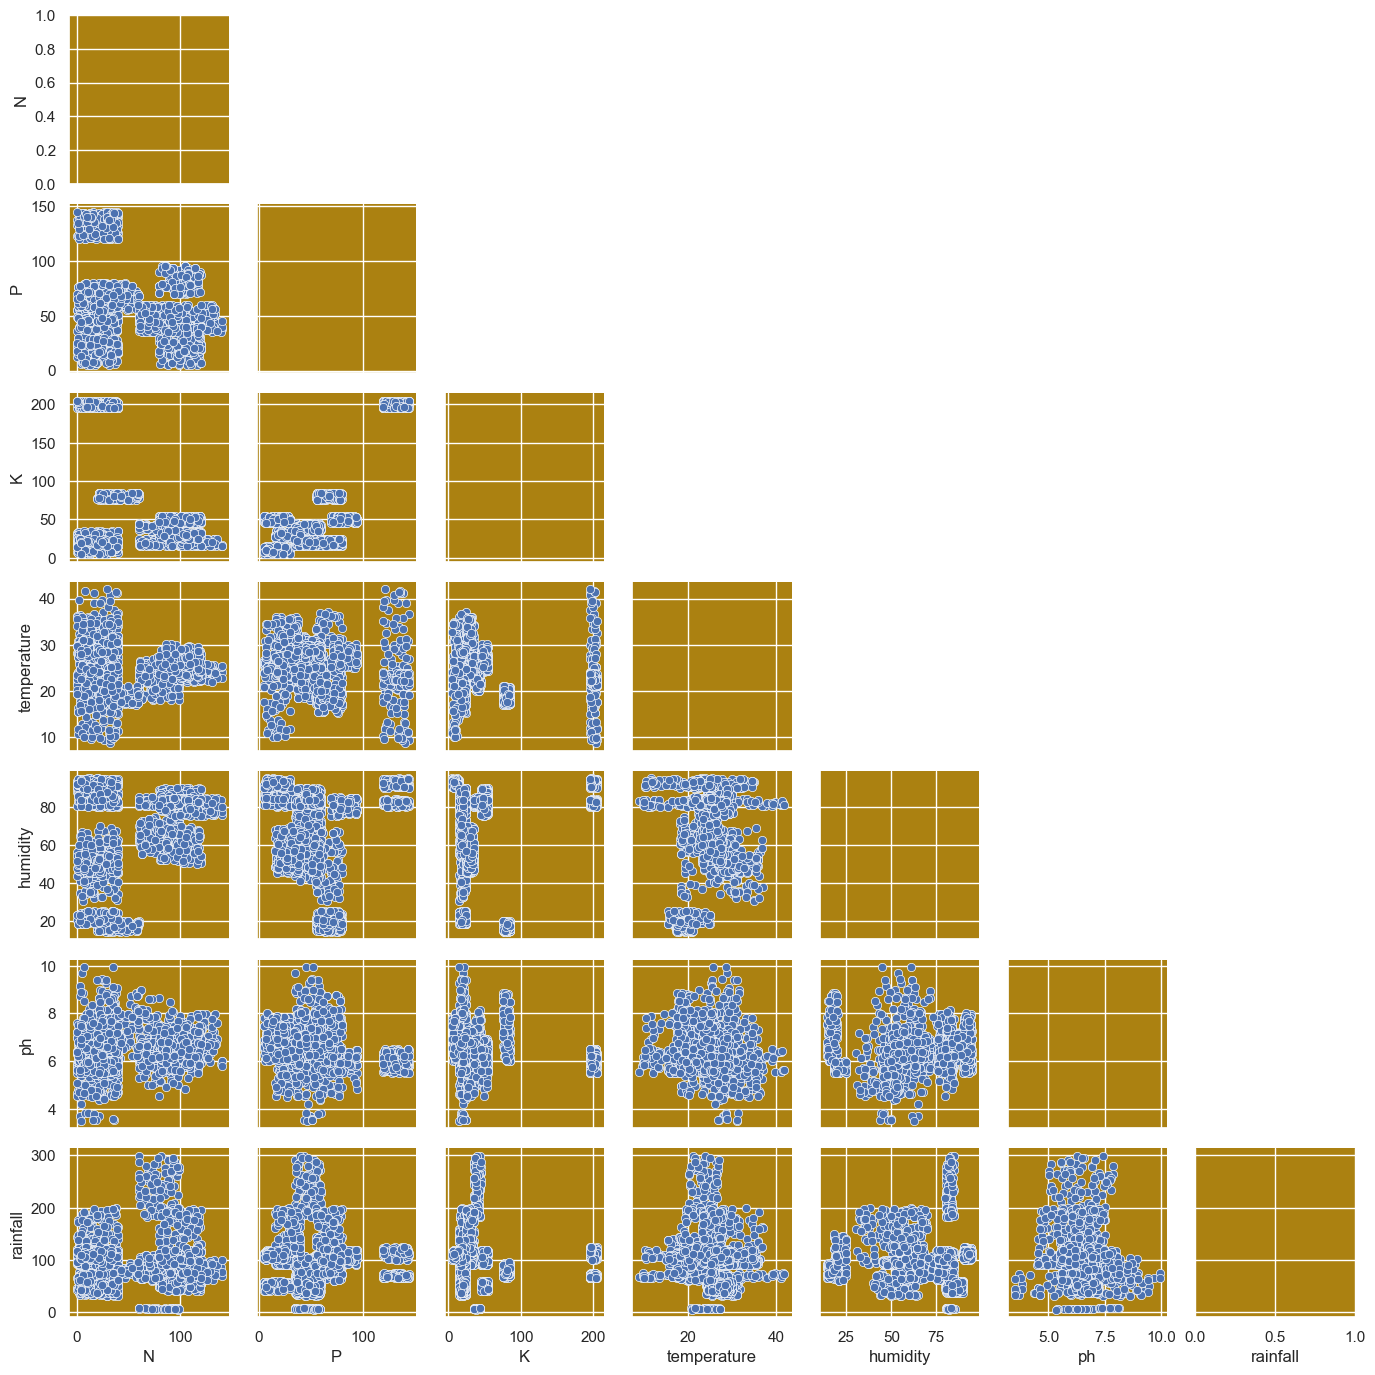

In [13]:
sns.set(rc={"axes.facecolor":"#AB8111", "figure.facecolor":"#ffffff"})
sns.pairplot(df, diag_kind = "reg", height = 2, aspect = 1, corner = True);

#### <b>5.3 Lineplot</b>

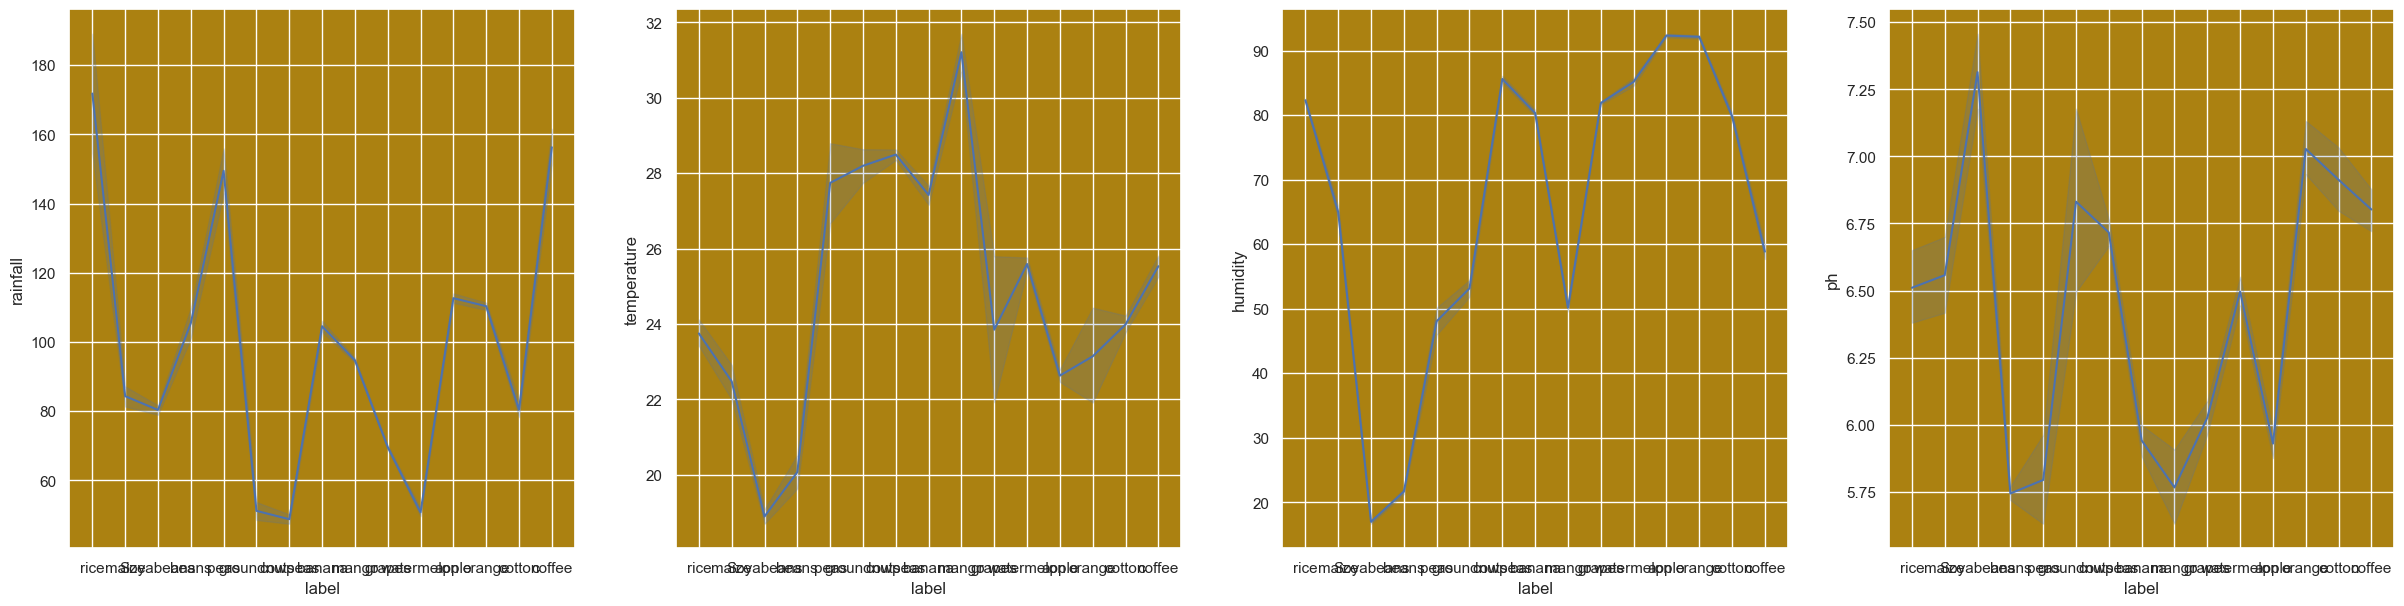

In [14]:
sns.set(rc = {"axes.facecolor":"#AB8111", "figure.facecolor":"#ffffff"})

fig, axes = plt.subplots(1,4, figsize = (30, 7))


sns.lineplot(ax = axes[0], x = df["label"], y = df["rainfall"]);
sns.lineplot(ax = axes[1], x = df["label"], y = df["temperature"]);
sns.lineplot(ax = axes[2], x = df["label"], y = df["humidity"]);
sns.lineplot(ax = axes[3], x = df["label"], y = df["ph"]);

## <b>6| DATA PREPROCESSING</b>

#### <b>6.1 The number of rows to train the model on</b>

In [15]:
training_data_len = int(np.ceil( len(df) * .95 ))
print("Training data length: ", training_data_len)

Training data length:  1613


#### <b>6.2 Normalization</b>

In [18]:
#scaler = MinMaxScaler(feature_range = (0, 1))
#scaled_data = scaler.fit_transform(df1)
#scaled_data